# Exploratory Data Analysis

In this notebook, I'll conduct EDA on the dataset to understand the following:
- Descriptive Analytics - What dataset am I dealing with and who are these users?
- Diagnostics Analytics - Why are the users churning?

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path

## Preprocessing Data

I'll load the dataset, clean it up and slice them to facilitate simple descriptive analytics

In [280]:
df = pd.read_excel('../data/Customer-Churn.xlsx')

In [297]:
# Drop irrelevant attributes
df1 = df.drop(['CustomerID','Country','State','Count','Zip Code','Lat Long','Latitude','Longitude'],axis=1)

# Convert empty strings to none values
df1['Total Charges'] = df1['Total Charges'].replace(" ",None).dropna().apply(lambda x:float(x))

print(f"""
Number of Attributes: {len(df.columns)} 
NUmber of Observations: {len(df)} 
Number of Unique Users: {df.CustomerID.nunique()}
""")

df1.head()


Number of Attributes: 30 
NUmber of Observations: 7043 
Number of Unique Users: 7043



,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Moved
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Moved
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Competitor had better devices


There are quite a few attributes within the dataset, 30 to be exact. I'll drop those that are not relevant to us.

*CustomerID*: Since the dataset has 7043 rows, and the number of unique CustomerID are 7043, this mean that each row is a unique user and 'CustomerID' is irrelevant to us for futher exploration.

*Count*: There are only 1 unique value in this attribute, and all of the values are '1'. This attribute is irrelevant henceforth.

*Country*: All of the users in the dataset are from United States.

*State*: All of the users are from California

*Lat Long*: There are already similar attributes, 'Latitude' and 'Longitude' available in the dataset.

*Zipcode*: We have coordinates for geographic locations. 

*Latitude*: Dropping coordinates first to avoid geospatial analysis in this section

*Longitude*: Dropping coordinates first to avoid geospatial analysis in this section

## Descriptive Analytics

<AxesSubplot:>

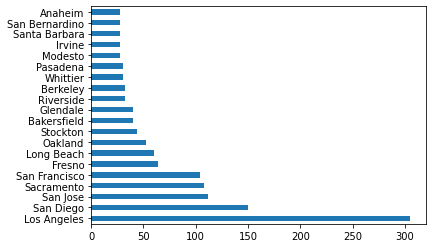

In [282]:
# Top 20 cities that users are from
df.City.value_counts().sort_values(ascending=False).head(20).plot(kind='barh')

Plotting categorical variables to look at variation of users who churn within these categories

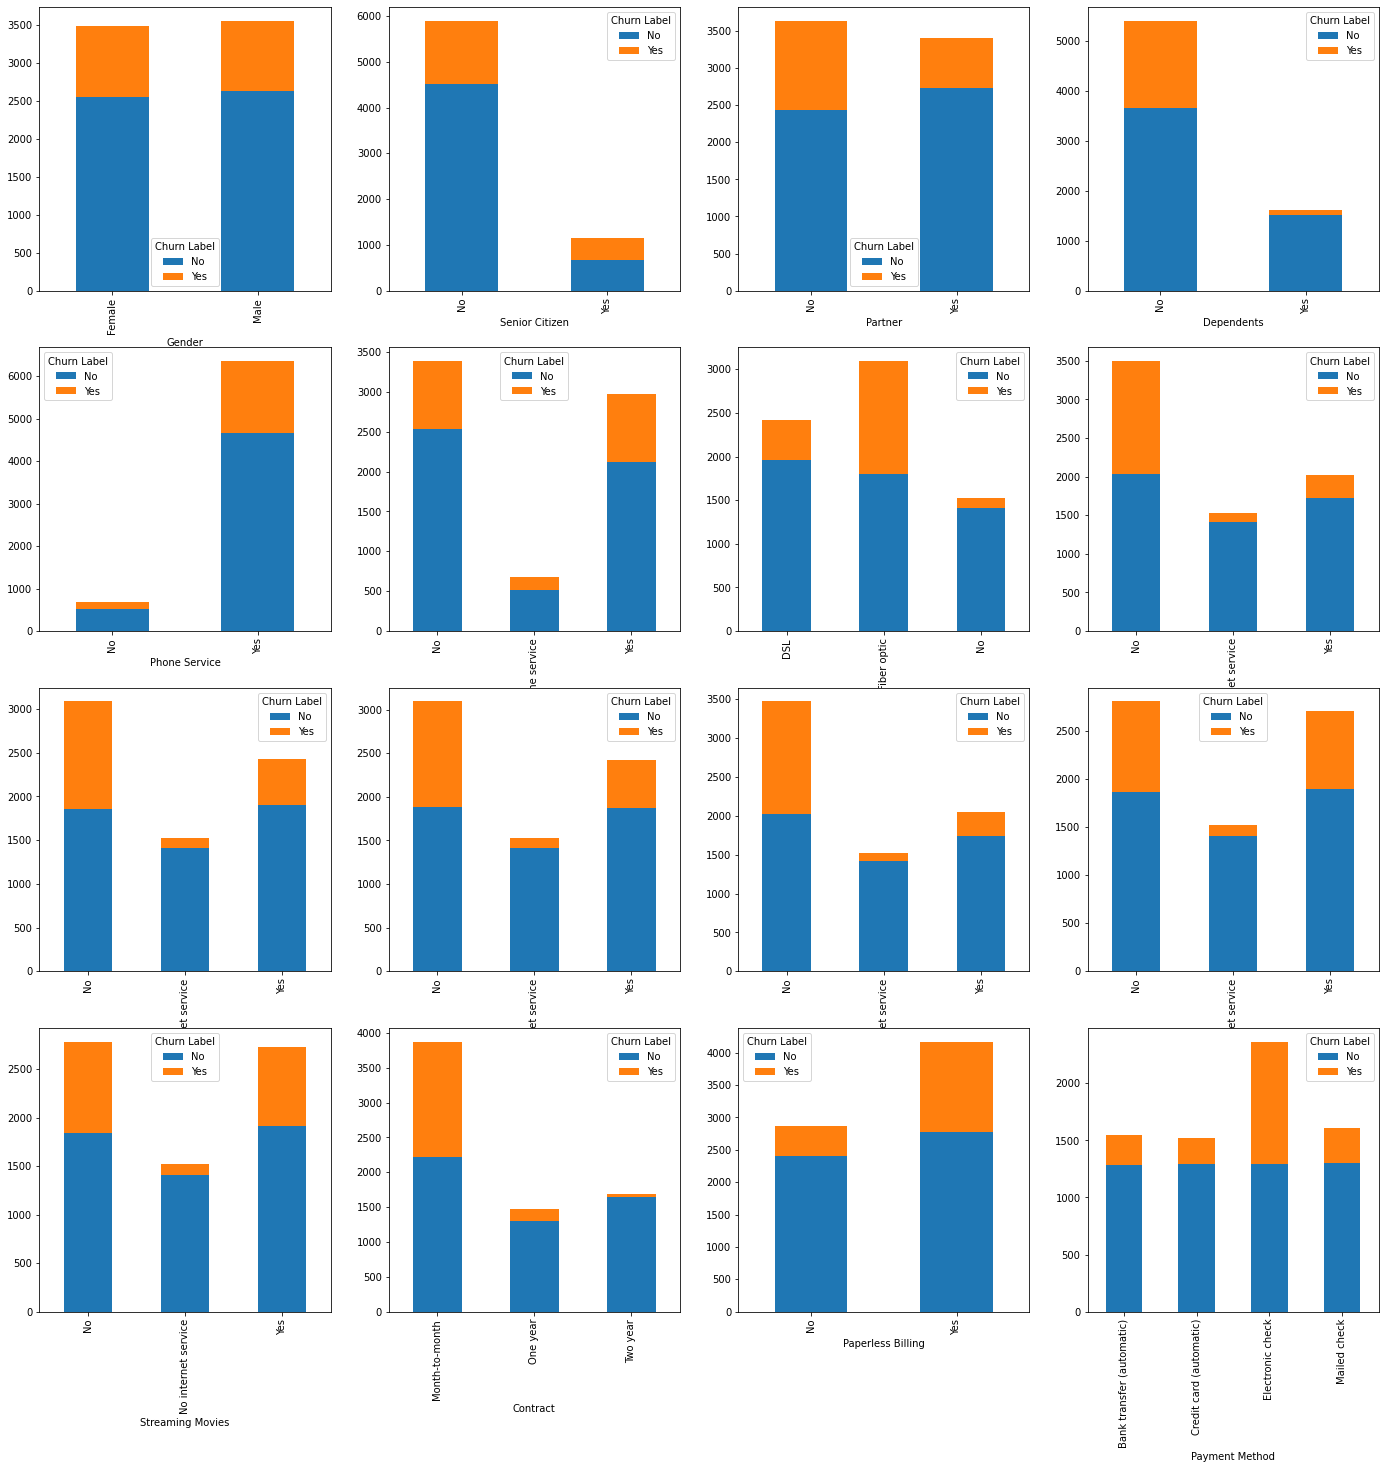

In [283]:
cat_covariates = ['Gender', 'Senior Citizen', 'Partner', 'Dependents','Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

fig, axes = plt.subplots(4, 4, sharey=False, figsize=(24,24))

for i in enumerate(cat_covariates[:4]):
    df1.groupby(by=[i[1],'Churn Label']).size().unstack().plot(kind='bar',stacked=True,ax=axes[0,i[0]])

for i in enumerate(cat_covariates[4:8]):
    df1.groupby(by=[i[1],'Churn Label']).size().unstack().plot(kind='bar',stacked=True,ax=axes[1,i[0]])

for i in enumerate(cat_covariates[8:12]):
    df1.groupby(by=[i[1],'Churn Label']).size().unstack().plot(kind='bar',stacked=True,ax=axes[2,i[0]])

for i in enumerate(cat_covariates[12:]):
    df1.groupby(by=[i[1],'Churn Label']).size().unstack().plot(kind='bar',stacked=True,ax=axes[3,i[0]])

Plotting continous variables to look at variation of users who churned

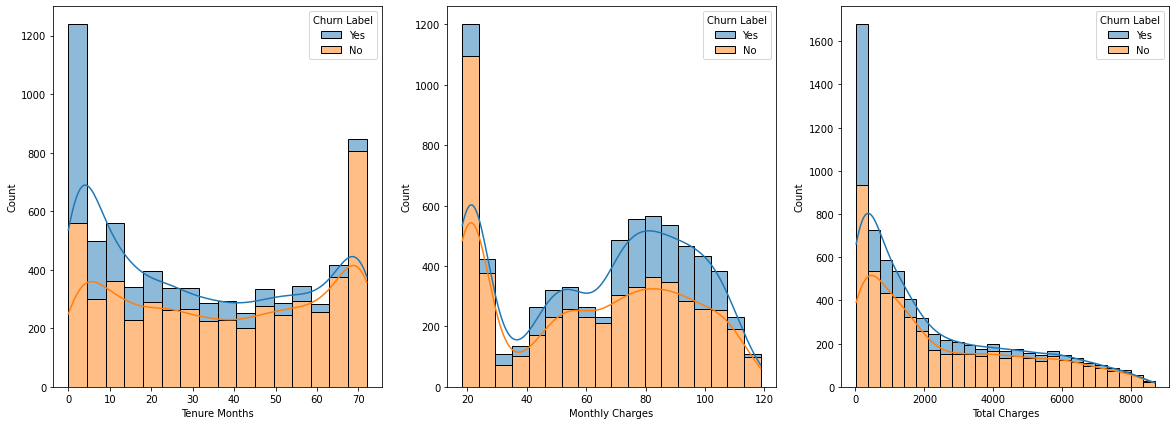

In [304]:
cont_covariates = ['Tenure Months','Monthly Charges','Total Charges']

fig, axes = plt.subplots(1,3, sharey=False, figsize=(20,7))

for i in enumerate(cont_covariates):
    sns.histplot(data=df1, x=df1[i[1]], multiple="stack", hue=df1['Churn Label'], kde=True, ax=axes[i[0]]);


## Diagnostics Analytics

A few attributes of interest here could help to enlignten why users churned. Most notably **Churn Reason** will shed light on their reason, and we can further explore the type of users that churned.

<AxesSubplot:>

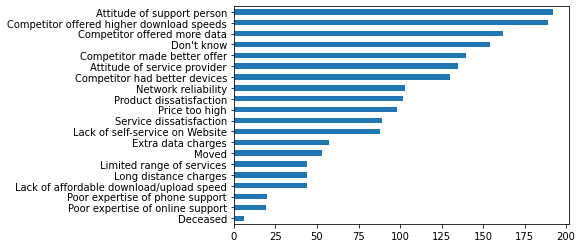

In [101]:
df1['Churn Reason'].value_counts().sort_values(ascending=True).plot(kind='barh')

In [102]:
print(f"""
Users have provided us with {df['Churn Reason'].nunique()} churn reasons

Lets look at the top 10 reasons and the number of users that fall within this category:
---
{df['Churn Reason'].value_counts().sort_values(ascending=False).head(10)}

""")


Users have provided us with 20 churn reasons

Lets look at the top 10 reasons and the number of users that fall within this category:
---
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Name: Churn Reason, dtype: int64




## Discussion Points

Looking at the descriptive exploration of categorical and continuous independent variables against the dependent variable (churn), we can observe that most of the variables have substantial variable and hence are potentially good predictors of churn. We will proceed to use all of these features for our modelling. 